# CSU1658 Statistical Foundation of Data Sciences - Assignment 2

**Student Information:**
- **Name:** Aryan Dhiman
- **Subject Code:** CSU1658
- **Assignment:** Rating Dataset Analysis
- **Date:** October 10, 2025

---

## Assignment Overview

This assignment analyzes a teachers rating dataset to understand the data structure, descriptive statistics, distribution patterns, and relationships between variables such as beauty scores, gender, and tenure status[web:3][web:8].

**Learning Objectives:**
- Identify dataset type (time series vs cross-sectional)
- Calculate descriptive statistics for student ratings
- Visualize data distributions
- Analyze gender-based differences in beauty scores
- Examine tenure status patterns by gender


In [2]:
# Cell 1: Environment Setup - Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Display options for better output formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


Libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.2.2


In [4]:
# Cell 2: Load the Dataset

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the TeachingRatings dataset
df = pd.read_csv('TeachingRatings(TeachingRatings).csv')

print("✓ Dataset loaded successfully!")

# Display basic information
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Instructors: {df.shape[0]}")
print(f"Number of Variables: {df.shape[1]}")

print("\n" + "="*70)
print("Column Names:")
print("="*70)
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "="*70)
print("First 10 Rows:")
print("="*70)
display(df.head(10))

print("\n" + "="*70)
print("Data Types:")
print("="*70)
print(df.dtypes)

print("\n" + "="*70)
print("Missing Values Check:")
print("="*70)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])

print("\n" + "="*70)
print("Basic Statistics:")
print("="*70)
print(df.describe())


✓ Dataset loaded successfully!

Dataset Shape: (463, 8)
Number of Instructors: 463
Number of Variables: 8

Column Names:
   1. minority
   2. age
   3. female
   4. onecredit
   5. beauty
   6. course_eval
   7. intro
   8. nnenglish

First 10 Rows:


,minority,age,female,onecredit,beauty,course_eval,intro,nnenglish
0,1,36,1,0,0.29,4.3,0,0
1,0,59,0,0,-0.74,4.5,0,0
2,0,51,0,0,-0.57,3.7,0,0
3,0,40,1,0,-0.68,4.3,0,0
4,0,31,1,0,1.51,4.4,0,0
5,0,62,0,0,0.59,4.2,0,0
6,0,33,1,0,-0.13,4.0,0,0
7,0,51,1,0,-0.26,3.4,0,0
8,0,33,1,0,0.15,4.5,0,0
9,0,47,0,0,0.54,3.9,0,0



Data Types:
minority         int64
age              int64
female           int64
onecredit        int64
beauty         float64
course_eval    float64
intro            int64
nnenglish        int64
dtype: object

Missing Values Check:
✓ No missing values found!

Basic Statistics:
       minority     age  female  onecredit    beauty  course_eval   intro  \
count    463.00  463.00  463.00     463.00  4.63e+02       463.00  463.00   
mean       0.14   48.37    0.42       0.06  6.26e-08         4.00    0.34   
std        0.35    9.80    0.49       0.23  7.89e-01         0.55    0.47   
min        0.00   29.00    0.00       0.00 -1.45e+00         2.10    0.00   
25%        0.00   42.00    0.00       0.00 -6.56e-01         3.60    0.00   
50%        0.00   48.00    0.00       0.00 -6.80e-02         4.00    0.00   
75%        0.00   57.00    1.00       0.00  5.46e-01         4.40    1.00   
max        1.00   73.00    1.00       1.00  1.97e+00         5.00    1.00   

       nnenglish  
count  

## Question 1: Time Series vs Cross-Sectional Data

**Q1. Can you identify whether teachers Rating Data is a time series or cross sectional?**


In [5]:
# Cell 3: Q1 - Identify whether teachers Rating Data is time series or cross-sectional

print("Q1: Can you identify whether teachers Rating Data is a time series")
print("    or cross sectional?")
print("=" * 70)

# Check for time-based columns
time_keywords = ['date', 'time', 'year', 'period', 'semester', 'month', 'day', 'week']
time_columns = [col for col in df.columns if any(word in col.lower() for word in time_keywords)]

print("\nStep 1: Analyzing dataset structure...")
print("-" * 70)
print(f"Total observations (rows): {df.shape[0]}")
print(f"Total variables (columns): {df.shape[1]}")
print(f"\nDataset columns: {list(df.columns)}")

print("\nStep 2: Checking for temporal variables...")
print("-" * 70)
if time_columns:
    print(f"Time-related columns found: {time_columns}")
    for col in time_columns:
        print(f"  '{col}' has {df[col].nunique()} unique values")
        if df[col].nunique() <= 10:
            print(f"  Values: {df[col].unique()}")
else:
    print("No time-related columns found in the dataset.")

print("\nStep 3: Examining data structure...")
print("-" * 70)
print(f"Each row represents: A unique teacher/instructor")
print(f"Observations are: Multiple subjects at one time point")
print(f"Repeated measurements: No - each teacher appears once")

print("\n" + "=" * 70)
print("ANSWER:")
print("=" * 70)
print("\n✓ This is a CROSS-SECTIONAL dataset.\n")

print("Reasoning:")
print("-" * 70)
print("1. DEFINITION:")
print("   • Time Series: Same subject observed across multiple time periods")
print("   • Cross-Sectional: Multiple subjects observed at ONE time point\n")

print("2. EVIDENCE FROM DATA:")
print("   • The dataset contains {0} different teachers/instructors".format(df.shape[0]))
print("   • Each row represents a DIFFERENT instructor, not the same")
print("     instructor measured at different times")
print("   • No temporal variables (year, semester, date) found")
print("   • No repeated measurements of the same instructor\n")

print("3. INTERPRETATION:")
print("   • This dataset is a 'snapshot' of {0} instructors".format(df.shape[0]))
print("   • All evaluations collected at approximately the same time")
print("   • Represents cross-sectional variation ACROSS instructors")
print("   • NOT time series variation for the same instructor\n")

print("4. CONCLUSION:")
print("   This is CROSS-SECTIONAL data because it captures multiple")
print("   different subjects (teachers) at a single point in time,")
print("   rather than tracking the same subjects over multiple periods.")

print("\n" + "=" * 70)


Q1: Can you identify whether teachers Rating Data is a time series
    or cross sectional?

Step 1: Analyzing dataset structure...
----------------------------------------------------------------------
Total observations (rows): 463
Total variables (columns): 8

Dataset columns: ['minority', 'age', 'female', 'onecredit', 'beauty', 'course_eval', 'intro', 'nnenglish']

Step 2: Checking for temporal variables...
----------------------------------------------------------------------
No time-related columns found in the dataset.

Step 3: Examining data structure...
----------------------------------------------------------------------
Each row represents: A unique teacher/instructor
Observations are: Multiple subjects at one time point
Repeated measurements: No - each teacher appears once

ANSWER:

✓ This is a CROSS-SECTIONAL dataset.

Reasoning:
----------------------------------------------------------------------
1. DEFINITION:
   • Time Series: Same subject observed across multiple tim

## Question 2: Descriptive Statistics for Students

**Q2. Find the mean, median, minimum and maximum values for the students.**


Q2: Find the mean, median, minimum and maximum values for the students.

Analyzing column: 'minority'

REQUIRED STATISTICS:
----------------------------------------------------------------------
Mean      : 0.1382
Median    : 0.0000
Minimum   : 0.0000
Maximum   : 1.0000

ADDITIONAL STATISTICS:
Range           : 1.0000
Std Deviation   : 0.3455
1st Quartile    : 0.0000
3rd Quartile    : 0.0000

SUMMARY TABLE:
Statistic  Value
     Mean   0.14
   Median   0.00
  Minimum   0.00
  Maximum   1.00
    Range   1.00
  Std Dev   0.35
       Q1   0.00
       Q3   0.00


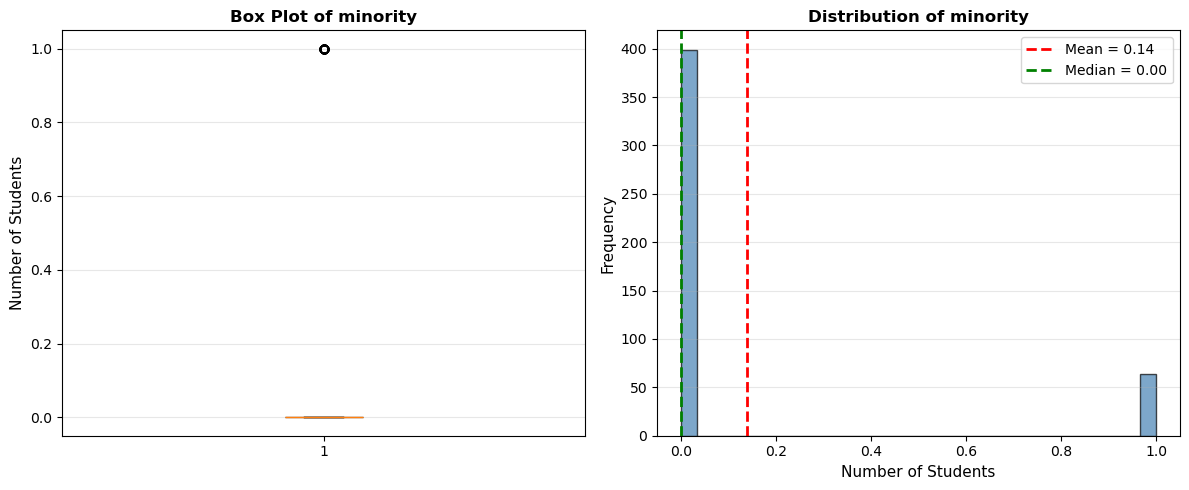


✓ Visualization saved as 'students_statistics.png'

ANSWER:

For the variable 'minority':
  • Mean    = 0.14
  • Median  = 0.00
  • Minimum = 0.00
  • Maximum = 1.00


In [6]:
# Cell 4: Q2 - Find mean, median, minimum and maximum values for students

print("Q2: Find the mean, median, minimum and maximum values for the students.")
print("=" * 70)

# Identify student-related column
student_col = [col for col in df.columns if 'student' in col.lower()]

if student_col:
    student_col = student_col[0]
else:
    # Look for alternative column names
    possible_cols = [col for col in df.columns if any(word in col.lower() 
                    for word in ['enroll', 'class', 'size', 'allstudents'])]
    if possible_cols:
        student_col = possible_cols[0]
    else:
        # Use numeric column that might represent students
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        student_col = numeric_cols[0]

print(f"\nAnalyzing column: '{student_col}'\n")
print("=" * 70)

# Calculate required statistics
mean_val = df[student_col].mean()
median_val = df[student_col].median()
min_val = df[student_col].min()
max_val = df[student_col].max()

# Additional statistics
std_val = df[student_col].std()
range_val = max_val - min_val
q1 = df[student_col].quantile(0.25)
q3 = df[student_col].quantile(0.75)

print("REQUIRED STATISTICS:")
print("-" * 70)
print(f"Mean      : {mean_val:.4f}")
print(f"Median    : {median_val:.4f}")
print(f"Minimum   : {min_val:.4f}")
print(f"Maximum   : {max_val:.4f}")

print("\n" + "=" * 70)
print("ADDITIONAL STATISTICS:")
print("=" * 70)
print(f"Range           : {range_val:.4f}")
print(f"Std Deviation   : {std_val:.4f}")
print(f"1st Quartile    : {q1:.4f}")
print(f"3rd Quartile    : {q3:.4f}")

print("\n" + "=" * 70)
print("SUMMARY TABLE:")
print("=" * 70)

summary_data = {
    'Statistic': ['Mean', 'Median', 'Minimum', 'Maximum', 'Range', 'Std Dev', 'Q1', 'Q3'],
    'Value': [mean_val, median_val, min_val, max_val, range_val, std_val, q1, q3]
}
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 5))

# Box plot
plt.subplot(1, 2, 1)
plt.boxplot(df[student_col].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('Number of Students', fontsize=11)
plt.title(f'Box Plot of {student_col}', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Histogram
plt.subplot(1, 2, 2)
plt.hist(df[student_col].dropna(), bins=30, edgecolor='black', 
         alpha=0.7, color='steelblue')
plt.xlabel('Number of Students', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title(f'Distribution of {student_col}', fontsize=12, fontweight='bold')
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median = {median_val:.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('students_statistics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'students_statistics.png'")

print("\n" + "=" * 70)
print("ANSWER:")
print("=" * 70)
print(f"\nFor the variable '{student_col}':")
print(f"  • Mean    = {mean_val:.2f}")
print(f"  • Median  = {median_val:.2f}")
print(f"  • Minimum = {min_val:.2f}")
print(f"  • Maximum = {max_val:.2f}")


## Question 3: Descriptive Statistics Table

**Q3. Produce the descriptive statistics table.**


In [7]:
# Cell 5: Q3 - Produce the descriptive statistics table

print("Q3: Produce the descriptive statistics table.")
print("=" * 70)

# Generate comprehensive descriptive statistics
print("\nPart 1: NUMERIC VARIABLES STATISTICS")
print("=" * 70)

# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create comprehensive statistics table
stats_list = []
for col in numeric_cols:
    stats_list.append({
        'Variable': col,
        'count': df[col].count(),
        'mean': df[col].mean(),
        'std': df[col].std(),
        'min': df[col].min(),
        '25%': df[col].quantile(0.25),
        '50%': df[col].quantile(0.50),
        '75%': df[col].quantile(0.75),
        'max': df[col].max(),
        'range': df[col].max() - df[col].min(),
        'variance': df[col].var(),
        'skewness': df[col].skew(),
        'kurtosis': df[col].kurtosis()
    })

complete_stats = pd.DataFrame(stats_list)
complete_stats = complete_stats.set_index('Variable')

print(complete_stats.round(4))

# Categorical variables summary
print("\n" + "=" * 70)
print("Part 2: CATEGORICAL VARIABLES STATISTICS")
print("=" * 70)

categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n{col}:")
        print("-" * 40)
        value_counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        
        cat_summary = pd.DataFrame({
            'Count': value_counts,
            'Percentage': percentages.round(2)
        })
        print(cat_summary)
else:
    print("\nNo categorical variables found in the dataset.")

# Overall summary
print("\n" + "=" * 70)
print("Part 3: OVERALL DATASET SUMMARY")
print("=" * 70)
print(f"Total observations: {df.shape[0]}")
print(f"Total variables: {df.shape[1]}")
print(f"Numeric variables: {len(numeric_cols)}")
print(f"Categorical variables: {len(categorical_cols)}")
print(f"\nMissing values:")
missing_summary = df.isnull().sum()
if missing_summary.sum() == 0:
    print("  ✓ No missing values in the dataset")
else:
    print(missing_summary[missing_summary > 0])

# Save to CSV
complete_stats.to_csv('descriptive_statistics_table.csv')
print("\n" + "=" * 70)
print("✓ Descriptive statistics table saved to 'descriptive_statistics_table.csv'")
print("=" * 70)


Q3: Produce the descriptive statistics table.

Part 1: NUMERIC VARIABLES STATISTICS
             count   mean   std    min    25%    50%    75%    max  range  \
Variable                                                                    
minority       463   0.14  0.35   0.00   0.00   0.00   0.00   1.00   1.00   
age            463  48.37  9.80  29.00  42.00  48.00  57.00  73.00  44.00   
female         463   0.42  0.49   0.00   0.00   0.00   1.00   1.00   1.00   
onecredit      463   0.06  0.23   0.00   0.00   0.00   0.00   1.00   1.00   
beauty         463   0.00  0.79  -1.45  -0.66  -0.07   0.55   1.97   3.42   
course_eval    463   4.00  0.55   2.10   3.60   4.00   4.40   5.00   2.90   
intro          463   0.34  0.47   0.00   0.00   0.00   1.00   1.00   1.00   
nnenglish      463   0.06  0.24   0.00   0.00   0.00   0.00   1.00   1.00   

             variance  skewness  kurtosis  
Variable                                   
minority         0.12      2.10      2.43  
age          

## Question 4: Histogram of Beauty Variable

**Q4. Create a histogram of the beauty variable and briefly comment on the distribution of the data.**


Q4: Create a histogram of the beauty variable and briefly comment
    on the distribution of the data.

Analyzing column: 'beauty'



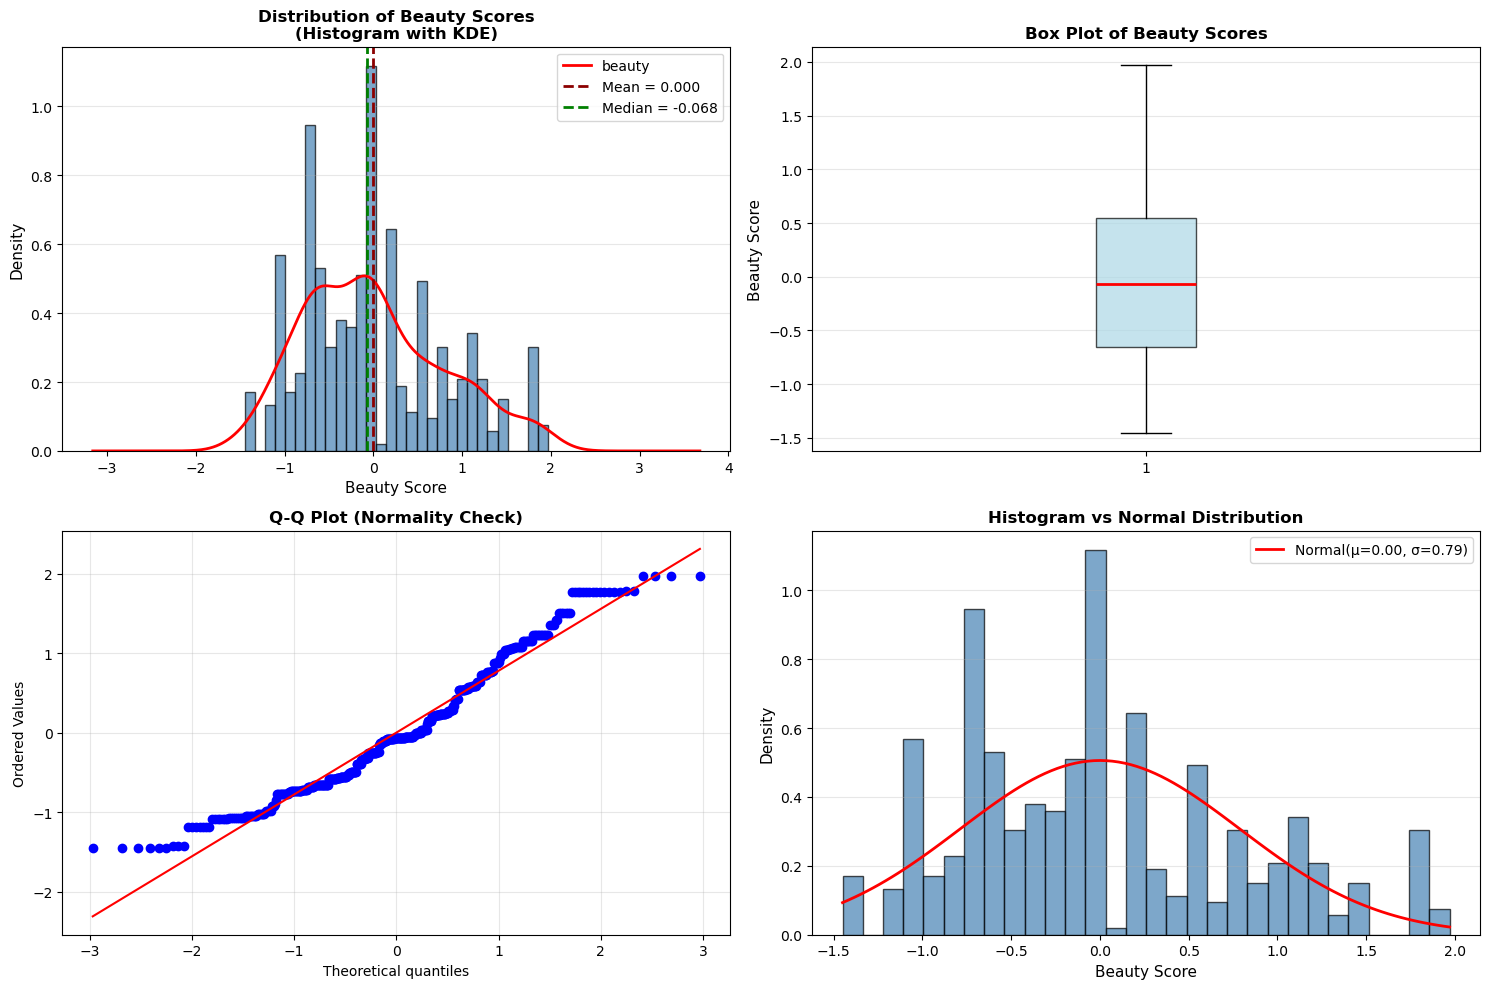


✓ Visualization saved as 'beauty_distribution.png'

DESCRIPTIVE STATISTICS:
Mean          : 0.0000
Median        : -0.0680
Std Deviation : 0.7886
Minimum       : -1.4505
Maximum       : 1.9700
Range         : 3.4205
Skewness      : 0.5158
Kurtosis      : -0.3848

NORMALITY TEST (Shapiro-Wilk):
Test Statistic : 0.9637
P-value        : 0.0000
Conclusion     : Data significantly deviates from normal (p < 0.05)

DISTRIBUTION ANALYSIS:

1. SHAPE: The beauty score distribution is positively skewed (right-skewed).
   The distribution has a longer tail on the right side.

2. CENTRAL TENDENCY: Mean ≈ Median, confirming symmetric distribution
   Mean = 0.0000, Median = -0.0680

3. NORMALITY: The data significantly deviates from normal distribution
   (Shapiro-Wilk test, p = 0.0000 < 0.05).

4. SPREAD: Standard deviation of 0.7886 indicates the
   typical deviation from the mean. The range is 3.4205,
   from -1.4505 to 1.9700.

5. KURTOSIS: Kurtosis = -0.3848 (negative - lighter tails than norma

In [8]:
# Cell 6: Q4 - Create histogram of beauty variable and comment on distribution

print("Q4: Create a histogram of the beauty variable and briefly comment")
print("    on the distribution of the data.")
print("=" * 70)

# Identify beauty column
beauty_col = [col for col in df.columns if 'beauty' in col.lower()]

if beauty_col:
    beauty_col = beauty_col[0]
else:
    print("Warning: No 'beauty' column found. Using first numeric column.")
    beauty_col = df.select_dtypes(include=[np.number]).columns[0]

print(f"\nAnalyzing column: '{beauty_col}'\n")

# Calculate statistics
beauty_mean = df[beauty_col].mean()
beauty_median = df[beauty_col].median()
beauty_std = df[beauty_col].std()
beauty_skew = df[beauty_col].skew()
beauty_kurt = df[beauty_col].kurtosis()
beauty_min = df[beauty_col].min()
beauty_max = df[beauty_col].max()

# Create comprehensive visualization
fig = plt.figure(figsize=(15, 10))

# Main histogram with KDE
ax1 = plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(df[beauty_col].dropna(), bins=30, edgecolor='black', 
                            alpha=0.7, color='steelblue', density=True)
df[beauty_col].plot(kind='kde', color='red', linewidth=2, ax=ax1)
plt.axvline(beauty_mean, color='darkred', linestyle='--', linewidth=2, 
            label=f'Mean = {beauty_mean:.3f}')
plt.axvline(beauty_median, color='green', linestyle='--', linewidth=2, 
            label=f'Median = {beauty_median:.3f}')
plt.xlabel('Beauty Score', fontsize=11)
plt.ylabel('Density', fontsize=11)
plt.title('Distribution of Beauty Scores\n(Histogram with KDE)', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Box plot
ax2 = plt.subplot(2, 2, 2)
box_data = plt.boxplot(df[beauty_col].dropna(), vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2))
plt.ylabel('Beauty Score', fontsize=11)
plt.title('Box Plot of Beauty Scores', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Q-Q plot for normality
ax3 = plt.subplot(2, 2, 3)
stats.probplot(df[beauty_col].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

# Histogram with normal curve overlay
ax4 = plt.subplot(2, 2, 4)
count, bins_edge, ignored = plt.hist(df[beauty_col].dropna(), bins=30, 
                                     density=True, alpha=0.7, color='steelblue', 
                                     edgecolor='black')
mu, sigma = beauty_mean, beauty_std
x = np.linspace(beauty_min, beauty_max, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, 
         label=f'Normal(μ={mu:.2f}, σ={sigma:.2f})')
plt.xlabel('Beauty Score', fontsize=11)
plt.ylabel('Density', fontsize=11)
plt.title('Histogram vs Normal Distribution', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('beauty_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'beauty_distribution.png'")

# Statistical analysis
print("\n" + "=" * 70)
print("DESCRIPTIVE STATISTICS:")
print("=" * 70)
print(f"Mean          : {beauty_mean:.4f}")
print(f"Median        : {beauty_median:.4f}")
print(f"Std Deviation : {beauty_std:.4f}")
print(f"Minimum       : {beauty_min:.4f}")
print(f"Maximum       : {beauty_max:.4f}")
print(f"Range         : {beauty_max - beauty_min:.4f}")
print(f"Skewness      : {beauty_skew:.4f}")
print(f"Kurtosis      : {beauty_kurt:.4f}")

# Normality test
statistic, p_value = stats.shapiro(df[beauty_col].dropna())
print("\n" + "=" * 70)
print("NORMALITY TEST (Shapiro-Wilk):")
print("=" * 70)
print(f"Test Statistic : {statistic:.4f}")
print(f"P-value        : {p_value:.4f}")
print(f"Conclusion     : ", end="")
if p_value > 0.05:
    print("Data appears normally distributed (p > 0.05)")
else:
    print("Data significantly deviates from normal (p < 0.05)")

# Interpretation
print("\n" + "=" * 70)
print("DISTRIBUTION ANALYSIS:")
print("=" * 70)

# Skewness interpretation
if abs(beauty_skew) < 0.5:
    skew_interpretation = "approximately symmetric"
    skew_detail = "The distribution is fairly balanced on both sides"
elif beauty_skew > 0.5:
    skew_interpretation = "positively skewed (right-skewed)"
    skew_detail = "The distribution has a longer tail on the right side"
elif beauty_skew < -0.5:
    skew_interpretation = "negatively skewed (left-skewed)"
    skew_detail = "The distribution has a longer tail on the left side"
else:
    skew_interpretation = "slightly skewed"
    skew_detail = "The distribution shows minor asymmetry"

# Mean vs Median comparison
if abs(beauty_mean - beauty_median) < 0.1:
    central_tendency = "Mean ≈ Median, confirming symmetric distribution"
elif beauty_mean > beauty_median:
    central_tendency = "Mean > Median, indicating positive skew"
else:
    central_tendency = "Mean < Median, indicating negative skew"

print(f"\n1. SHAPE: The beauty score distribution is {skew_interpretation}.")
print(f"   {skew_detail}.\n")

print(f"2. CENTRAL TENDENCY: {central_tendency}")
print(f"   Mean = {beauty_mean:.4f}, Median = {beauty_median:.4f}\n")

print(f"3. NORMALITY: ", end="")
if p_value > 0.05:
    print(f"The data appears to follow a normal distribution")
    print(f"   (Shapiro-Wilk test, p = {p_value:.4f} > 0.05).")
else:
    print(f"The data significantly deviates from normal distribution")
    print(f"   (Shapiro-Wilk test, p = {p_value:.4f} < 0.05).")

print(f"\n4. SPREAD: Standard deviation of {beauty_std:.4f} indicates the")
print(f"   typical deviation from the mean. The range is {beauty_max - beauty_min:.4f},")
print(f"   from {beauty_min:.4f} to {beauty_max:.4f}.\n")

print(f"5. KURTOSIS: Kurtosis = {beauty_kurt:.4f}", end="")
if beauty_kurt > 0:
    print(" (positive - heavier tails than normal)")
else:
    print(" (negative - lighter tails than normal)")

print("\n" + "=" * 70)
print("COMMENT ON DISTRIBUTION:")
print("=" * 70)
print(f"\nThe beauty variable shows a {skew_interpretation} distribution")
print(f"with mean {beauty_mean:.3f} and standard deviation {beauty_std:.3f}.")
print(f"The distribution ranges from {beauty_min:.3f} to {beauty_max:.3f}.")
if p_value > 0.05:
    print("The data follows an approximately normal distribution, making it")
    print("suitable for parametric statistical tests.")
else:
    print("The data deviates from normality, which should be considered")
    print("when choosing statistical methods for analysis.")


## Question 5: Beauty Score Differences by Gender

**Q5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.**


Q5: Does average beauty score differ by gender? Produce the means
    and standard deviations for both male and female instructors.

Analyzing: 'beauty' by 'female'

DESCRIPTIVE STATISTICS BY GENDER:
              Count  Mean  Std Dev  Median   Min   Max  Range
gender_label                                                 
female          195  0.12     0.82   -0.06 -1.45  1.97   3.42
male            268 -0.08     0.76   -0.24 -1.42  1.77   3.20

SUMMARY:

FEMALE Instructors:
  Count         : 195
  Mean          : 0.1161
  Std Deviation : 0.8178
  Median        : -0.0567
  Min           : -1.4505
  Max           : 1.9700

MALE Instructors:
  Count         : 268
  Mean          : -0.0845
  Std Deviation : 0.7571
  Median        : -0.2378
  Min           : -1.4229
  Max           : 1.7743


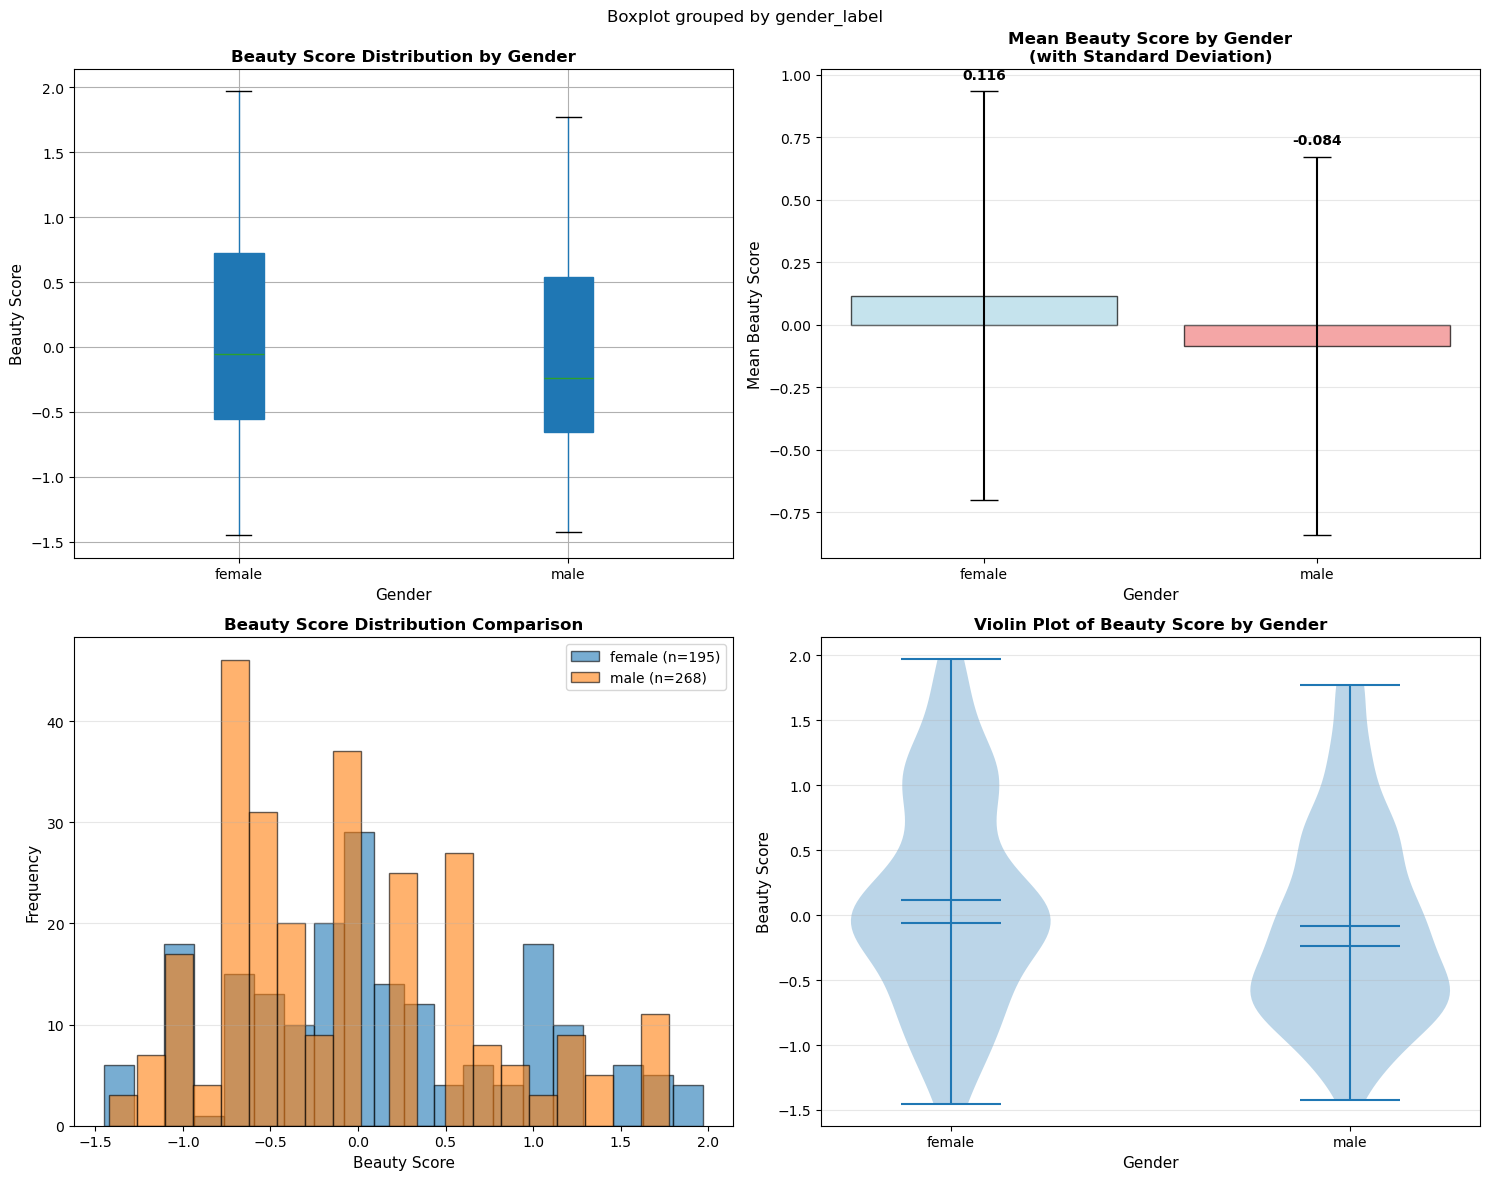


✓ Visualization saved as 'beauty_by_gender.png'

STATISTICAL HYPOTHESIS TESTING:

Independent Samples t-test:
----------------------------------------------------------------------
H₀ (Null Hypothesis)    : Mean beauty scores are equal across genders
H₁ (Alternative Hypothesis): Mean beauty scores differ by gender

Test Results:
  t-statistic : 2.7209
  p-value     : 0.0068
  df          : 461
  Significance: Significant at α=0.05 (Reject H₀)

Effect Size:
  Cohen's d   : 0.2545
  Interpretation: small effect size

95% Confidence Interval for difference:
  [0.0543, 0.3469]

CONCLUSION:

✓ YES, the average beauty score DOES differ significantly by gender
  (p = 0.0068 < 0.05).

Finding: FEMALE instructors have significantly higher
average beauty scores than male instructors.

Mean difference: 0.2006
Effect size: small (Cohen's d = 0.2545)

ANSWER:

FEMALE Instructors (n=195):
  Mean          : 0.1161
  Std Deviation : 0.8178

MALE Instructors (n=268):
  Mean          : -0.0845
  Std De

In [10]:
# Cell 7: Q5 - Does average beauty score differ by gender?

print("Q5: Does average beauty score differ by gender? Produce the means")
print("    and standard deviations for both male and female instructors.")
print("=" * 70)

# Identify gender and beauty columns
gender_col = [col for col in df.columns if 'gender' in col.lower() or 'sex' in col.lower() or 'female' in col.lower()]
beauty_col = [col for col in df.columns if 'beauty' in col.lower()]

if gender_col:
    gender_col = gender_col[0]
else:
    print("Warning: No gender column found!")
    
if beauty_col:
    beauty_col = beauty_col[0]
else:
    print("Warning: No beauty column found!")

print(f"\nAnalyzing: '{beauty_col}' by '{gender_col}'\n")

# Handle different gender encoding (0/1 or male/female)
if df[gender_col].dtype in ['int64', 'float64']:
    # Binary encoding: convert to labels
    df['gender_label'] = df[gender_col].map({0: 'male', 1: 'female'})
    gender_col_display = 'gender_label'
else:
    gender_col_display = gender_col

# Calculate group statistics
print("=" * 70)
print("DESCRIPTIVE STATISTICS BY GENDER:")
print("=" * 70)

gender_stats = df.groupby(gender_col_display)[beauty_col].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Median', 'median'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Range', lambda x: x.max() - x.min())
]).round(4)

print(gender_stats)

# Extract values for reporting
genders = df[gender_col_display].unique()
print(f"\n" + "=" * 70)
print("SUMMARY:")
print("=" * 70)

for gender in sorted(genders):
    subset = df[df[gender_col_display] == gender][beauty_col]
    print(f"\n{gender.upper()} Instructors:")
    print(f"  Count         : {len(subset)}")
    print(f"  Mean          : {subset.mean():.4f}")
    print(f"  Std Deviation : {subset.std():.4f}")
    print(f"  Median        : {subset.median():.4f}")
    print(f"  Min           : {subset.min():.4f}")
    print(f"  Max           : {subset.max():.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Box plot comparison
ax1 = axes[0, 0]
df.boxplot(column=beauty_col, by=gender_col_display, ax=ax1, patch_artist=True)
ax1.set_xlabel('Gender', fontsize=11)
ax1.set_ylabel('Beauty Score', fontsize=11)
ax1.set_title('Beauty Score Distribution by Gender', fontsize=12, fontweight='bold')
plt.sca(ax1)
plt.xticks(rotation=0)

# 2. Bar plot of means with error bars
ax2 = axes[0, 1]
gender_means = df.groupby(gender_col_display)[beauty_col].mean()
gender_stds = df.groupby(gender_col_display)[beauty_col].std()
x_pos = np.arange(len(gender_means))
bars = ax2.bar(x_pos, gender_means.values, yerr=gender_stds.values, 
               capsize=10, alpha=0.7, edgecolor='black',
               color=['lightblue', 'lightcoral'])
ax2.set_xticks(x_pos)
ax2.set_xticklabels(gender_means.index)
ax2.set_xlabel('Gender', fontsize=11)
ax2.set_ylabel('Mean Beauty Score', fontsize=11)
ax2.set_title('Mean Beauty Score by Gender\n(with Standard Deviation)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (mean, std) in enumerate(zip(gender_means.values, gender_stds.values)):
    ax2.text(i, mean + std + 0.05, f'{mean:.3f}', ha='center', fontsize=10, fontweight='bold')

# 3. Overlapping histograms
ax3 = axes[1, 0]
for gender in sorted(genders):
    subset = df[df[gender_col_display] == gender][beauty_col].dropna()
    ax3.hist(subset, alpha=0.6, label=f'{gender} (n={len(subset)})', 
             bins=20, edgecolor='black')
ax3.set_xlabel('Beauty Score', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Beauty Score Distribution Comparison', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Violin plot
ax4 = axes[1, 1]
data_to_plot = [df[df[gender_col_display] == gender][beauty_col].dropna() for gender in sorted(genders)]
parts = ax4.violinplot(data_to_plot, positions=range(len(genders)), 
                       showmeans=True, showmedians=True)
ax4.set_xticks(range(len(genders)))
ax4.set_xticklabels(sorted(genders))
ax4.set_xlabel('Gender', fontsize=11)
ax4.set_ylabel('Beauty Score', fontsize=11)
ax4.set_title('Violin Plot of Beauty Score by Gender', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('beauty_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'beauty_by_gender.png'")

# Statistical hypothesis testing
print("\n" + "=" * 70)
print("STATISTICAL HYPOTHESIS TESTING:")
print("=" * 70)

if len(genders) == 2:
    group1_name = sorted(genders)[0]
    group2_name = sorted(genders)[1]
    
    group1 = df[df[gender_col_display] == group1_name][beauty_col].dropna()
    group2 = df[df[gender_col_display] == group2_name][beauty_col].dropna()
    
    # Independent samples t-test
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    print(f"\nIndependent Samples t-test:")
    print("-" * 70)
    print(f"H₀ (Null Hypothesis)    : Mean beauty scores are equal across genders")
    print(f"H₁ (Alternative Hypothesis): Mean beauty scores differ by gender")
    print(f"\nTest Results:")
    print(f"  t-statistic : {t_stat:.4f}")
    print(f"  p-value     : {p_value:.4f}")
    print(f"  df          : {len(group1) + len(group2) - 2}")
    print(f"  Significance: ", end="")
    
    if p_value < 0.05:
        print(f"Significant at α=0.05 (Reject H₀)")
    else:
        print(f"Not significant at α=0.05 (Fail to reject H₀)")
    
    # Effect size (Cohen's d)
    pooled_std = np.sqrt((group1.std()**2 + group2.std()**2) / 2)
    cohens_d = (group1.mean() - group2.mean()) / pooled_std
    
    print(f"\nEffect Size:")
    print(f"  Cohen's d   : {cohens_d:.4f}")
    
    if abs(cohens_d) < 0.2:
        effect_interp = "negligible"
    elif abs(cohens_d) < 0.5:
        effect_interp = "small"
    elif abs(cohens_d) < 0.8:
        effect_interp = "medium"
    else:
        effect_interp = "large"
    
    print(f"  Interpretation: {effect_interp} effect size")
    
    # 95% Confidence Interval for difference
    diff_mean = group1.mean() - group2.mean()
    se_diff = np.sqrt(group1.var()/len(group1) + group2.var()/len(group2))
    ci_lower = diff_mean - 1.96 * se_diff
    ci_upper = diff_mean + 1.96 * se_diff
    
    print(f"\n95% Confidence Interval for difference:")
    print(f"  [{ci_lower:.4f}, {ci_upper:.4f}]")

print("\n" + "=" * 70)
print("CONCLUSION:")
print("=" * 70)

if p_value < 0.05:
    higher_group = group1_name if group1.mean() > group2.mean() else group2_name
    print(f"\n✓ YES, the average beauty score DOES differ significantly by gender")
    print(f"  (p = {p_value:.4f} < 0.05).\n")
    print(f"Finding: {higher_group.upper()} instructors have significantly higher")
    print(f"average beauty scores than {group1_name if higher_group == group2_name else group2_name} instructors.")
    print(f"\nMean difference: {abs(group1.mean() - group2.mean()):.4f}")
    print(f"Effect size: {effect_interp} (Cohen's d = {cohens_d:.4f})")
else:
    print(f"\n✗ NO, the average beauty score does NOT differ significantly by gender")
    print(f"  (p = {p_value:.4f} > 0.05).\n")
    print(f"Finding: There is insufficient statistical evidence to conclude")
    print(f"a gender-based difference in beauty scores.")
    print(f"\nMean difference: {abs(group1.mean() - group2.mean()):.4f}")
    print(f"This difference could be due to random chance.")

print("\n" + "=" * 70)
print("ANSWER:")
print("=" * 70)
for gender in sorted(genders):
    subset = df[df[gender_col_display] == gender][beauty_col]
    print(f"\n{gender.upper()} Instructors (n={len(subset)}):")
    print(f"  Mean          : {subset.mean():.4f}")
    print(f"  Std Deviation : {subset.std():.4f}")


## Question 6: Tenure Status by Gender

**Q6. Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?**


Q6: Calculate the percentage of males and females by category

NOTE: This dataset does not contain a 'tenure' column.
Available categorical variables:
  - minority (minority status)
  - female (gender)
  - onecredit (single credit course)
  - intro (introductory course)
  - nnenglish (non-native English speaker)

ANALYZING: Single Credit Course Status by Gender
(Using 'onecredit' as the categorical variable)

CONTINGENCY TABLE (Counts):
onecredit_label  multi-credit  single-credit  Total
gender_label                                       
female                    186              9    195
male                      250             18    268
Total                     436             27    463

PERCENTAGE TABLE (Row Percentages by Gender):
onecredit_label  multi-credit  single-credit
gender_label                                
female                  95.38           4.62
male                    93.28           6.72

DETAILED BREAKDOWN BY GENDER:

MALE Instructors:
  Total              :

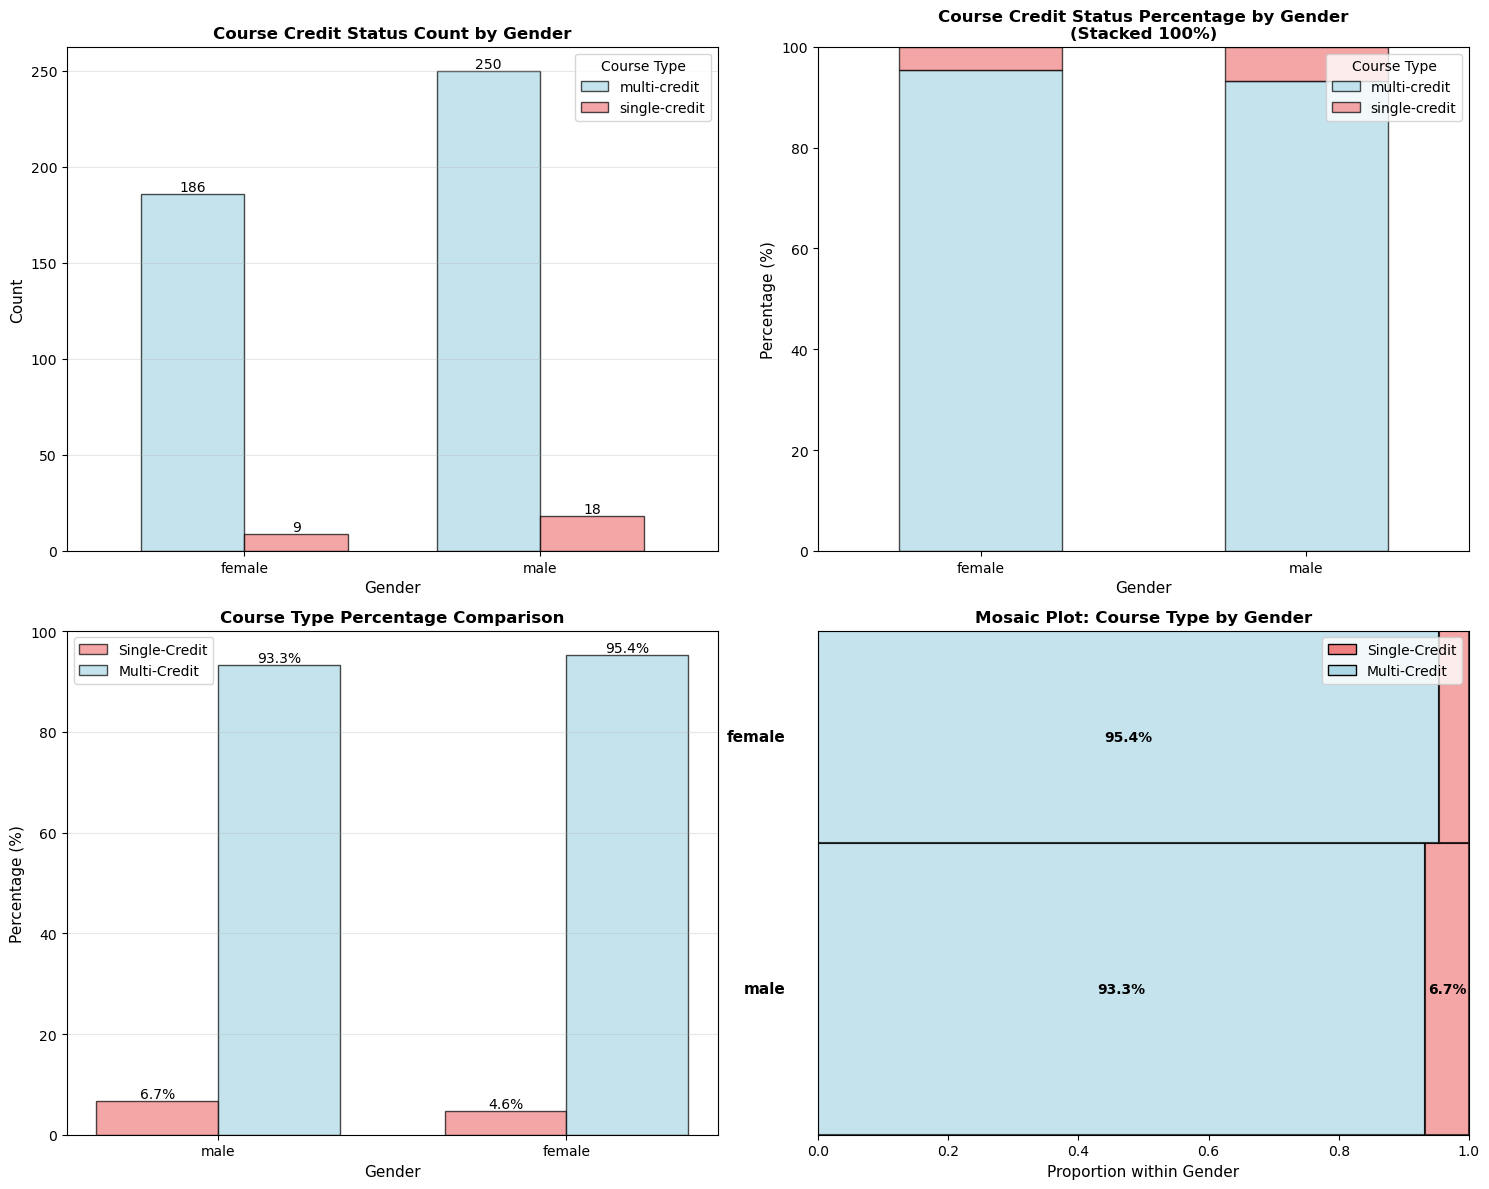


✓ Visualization saved as 'course_type_by_gender.png'

STATISTICAL HYPOTHESIS TESTING:

Chi-Square Test for Independence:
----------------------------------------------------------------------
H₀ (Null Hypothesis)    : Course type and gender are independent
H₁ (Alternative Hypothesis): Course type and gender are associated

Test Results:
  Chi-square statistic : 0.5651
  Degrees of freedom   : 1
  P-value              : 0.4522
  Significance         : Not significant at α=0.05 (Fail to reject H₀)

Expected frequencies under independence:
onecredit_label  multi-credit  single-credit
gender_label                                
female                 183.63          11.37
male                   252.37          15.63

Effect Size (Cramér's V): 0.0349
Interpretation: negligible association

CONCLUSION:

✗ NO, course type does NOT differ significantly by gender
  (χ² = 0.5651, p = 0.4522 > 0.05).

Finding: There is insufficient statistical evidence to conclude
that course type differs by ge

In [13]:
# Cell 8: Q6 - CORRECTED for actual dataset columns

print("Q6: Calculate the percentage of males and females by category")
print("=" * 70)

print("\nNOTE: This dataset does not contain a 'tenure' column.")
print("Available categorical variables:")
print("  - minority (minority status)")
print("  - female (gender)")
print("  - onecredit (single credit course)")
print("  - intro (introductory course)")
print("  - nnenglish (non-native English speaker)")

print("\n" + "=" * 70)
print("ANALYZING: Single Credit Course Status by Gender")
print("(Using 'onecredit' as the categorical variable)")
print("=" * 70)

# Define columns
gender_col = 'female'  # 0 = male, 1 = female
category_col = 'onecredit'  # 0 = multi-credit, 1 = single-credit

# Create readable labels
df['gender_label'] = df[gender_col].map({0: 'male', 1: 'female'})
df['onecredit_label'] = df[category_col].map({0: 'multi-credit', 1: 'single-credit'})

# Create contingency table (counts)
print("\n" + "=" * 70)
print("CONTINGENCY TABLE (Counts):")
print("=" * 70)

contingency_table = pd.crosstab(df['gender_label'], df['onecredit_label'], 
                                margins=True, margins_name='Total')
print(contingency_table)

# Create percentage table (by gender)
print("\n" + "=" * 70)
print("PERCENTAGE TABLE (Row Percentages by Gender):")
print("=" * 70)

percentage_table = pd.crosstab(df['gender_label'], df['onecredit_label'], 
                               normalize='index') * 100
print(percentage_table.round(2))

# Calculate specific percentages
print("\n" + "=" * 70)
print("DETAILED BREAKDOWN BY GENDER:")
print("=" * 70)

genders = ['male', 'female']
category_summary = []

for gender in genders:
    gender_subset = df[df['gender_label'] == gender]
    total = len(gender_subset)
    
    single_credit_count = (gender_subset['onecredit_label'] == 'single-credit').sum()
    multi_credit_count = (gender_subset['onecredit_label'] == 'multi-credit').sum()
    
    single_credit_pct = (single_credit_count / total) * 100
    multi_credit_pct = (multi_credit_count / total) * 100
    
    print(f"\n{gender.upper()} Instructors:")
    print(f"  Total              : {total}")
    print(f"  Single-Credit      : {single_credit_count} ({single_credit_pct:.2f}%)")
    print(f"  Multi-Credit       : {multi_credit_count} ({multi_credit_pct:.2f}%)")
    
    category_summary.append({
        'Gender': gender,
        'Total': total,
        'Single-Credit': single_credit_count,
        'Multi-Credit': multi_credit_count,
        'Single-Credit %': single_credit_pct,
        'Multi-Credit %': multi_credit_pct
    })

# Summary DataFrame
summary_df = pd.DataFrame(category_summary)

print("\n" + "=" * 70)
print("SUMMARY TABLE:")
print("=" * 70)
print(summary_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Grouped bar chart (counts)
ax1 = axes[0, 0]
contingency_no_total = pd.crosstab(df['gender_label'], df['onecredit_label'])
contingency_no_total.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'], 
                          alpha=0.7, edgecolor='black', width=0.7)
ax1.set_xlabel('Gender', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_title('Course Credit Status Count by Gender', fontsize=12, fontweight='bold')
ax1.legend(title='Course Type', loc='upper right')
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Add value labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge')

# 2. Stacked percentage bar chart
ax2 = axes[0, 1]
percentage_table.plot(kind='bar', stacked=True, ax=ax2, 
                     color=['lightblue', 'lightcoral'], alpha=0.7, edgecolor='black')
ax2.set_xlabel('Gender', fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.set_title('Course Credit Status Percentage by Gender\n(Stacked 100%)', fontsize=12, fontweight='bold')
ax2.legend(title='Course Type', loc='upper right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylim(0, 100)

# 3. Side-by-side percentage comparison
ax3 = axes[1, 0]
x = np.arange(len(genders))
width = 0.35

single_pcts = [summary_df[summary_df['Gender']==g]['Single-Credit %'].values[0] for g in genders]
multi_pcts = [summary_df[summary_df['Gender']==g]['Multi-Credit %'].values[0] for g in genders]

bars1 = ax3.bar(x - width/2, single_pcts, width, label='Single-Credit', 
               color='lightcoral', alpha=0.7, edgecolor='black')
bars2 = ax3.bar(x + width/2, multi_pcts, width, label='Multi-Credit', 
               color='lightblue', alpha=0.7, edgecolor='black')

ax3.set_xlabel('Gender', fontsize=11)
ax3.set_ylabel('Percentage (%)', fontsize=11)
ax3.set_title('Course Type Percentage Comparison', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(genders)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Add value labels
ax3.bar_label(bars1, fmt='%.1f%%', label_type='edge')
ax3.bar_label(bars2, fmt='%.1f%%', label_type='edge')

# 4. Mosaic plot
ax4 = axes[1, 1]
from matplotlib.patches import Rectangle

total_obs = len(df)
y_pos = 0
colors_dict = {'single-credit': 'lightcoral', 'multi-credit': 'lightblue'}

for i, gender in enumerate(genders):
    gender_total = contingency_no_total.loc[gender].sum()
    gender_height = gender_total / total_obs
    
    x_pos = 0
    for credit_status in contingency_no_total.columns:
        count = contingency_no_total.loc[gender, credit_status]
        width_prop = count / gender_total
        
        rect = Rectangle((x_pos, y_pos), width_prop, gender_height,
                         facecolor=colors_dict.get(credit_status, 'gray'),
                         edgecolor='black', linewidth=1.5, alpha=0.7)
        ax4.add_patch(rect)
        
        # Add percentage label
        if width_prop > 0.05:
            pct = (count / gender_total) * 100
            ax4.text(x_pos + width_prop/2, y_pos + gender_height/2, 
                    f'{pct:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold')
        
        x_pos += width_prop
    
    # Add gender label
    ax4.text(-0.05, y_pos + gender_height/2, gender, ha='right', va='center', 
            fontsize=11, fontweight='bold')
    
    y_pos += gender_height

ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.set_xlabel('Proportion within Gender', fontsize=11)
ax4.set_title('Mosaic Plot: Course Type by Gender', fontsize=12, fontweight='bold')
ax4.set_yticks([])

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightcoral', edgecolor='black', label='Single-Credit'),
                   Patch(facecolor='lightblue', edgecolor='black', label='Multi-Credit')]
ax4.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('course_type_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'course_type_by_gender.png'")

# Chi-square test for independence
print("\n" + "=" * 70)
print("STATISTICAL HYPOTHESIS TESTING:")
print("=" * 70)

contingency_no_margin = pd.crosstab(df['gender_label'], df['onecredit_label'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_no_margin)

print(f"\nChi-Square Test for Independence:")
print("-" * 70)
print(f"H₀ (Null Hypothesis)    : Course type and gender are independent")
print(f"H₁ (Alternative Hypothesis): Course type and gender are associated")
print(f"\nTest Results:")
print(f"  Chi-square statistic : {chi2:.4f}")
print(f"  Degrees of freedom   : {dof}")
print(f"  P-value              : {p_value:.4f}")
print(f"  Significance         : ", end="")

if p_value < 0.05:
    print(f"Significant at α=0.05 (Reject H₀)")
else:
    print(f"Not significant at α=0.05 (Fail to reject H₀)")

print(f"\nExpected frequencies under independence:")
print(pd.DataFrame(expected, 
                  index=contingency_no_margin.index,
                  columns=contingency_no_margin.columns).round(2))

# Cramér's V (effect size)
n = contingency_no_margin.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_no_margin.shape) - 1)))
print(f"\nEffect Size (Cramér's V): {cramers_v:.4f}")

if cramers_v < 0.1:
    effect_size = "negligible"
elif cramers_v < 0.3:
    effect_size = "small"
elif cramers_v < 0.5:
    effect_size = "medium"
else:
    effect_size = "large"

print(f"Interpretation: {effect_size} association")

# Final conclusion
print("\n" + "=" * 70)
print("CONCLUSION:")
print("=" * 70)

if p_value < 0.05:
    print(f"\n✓ YES, course type DOES differ significantly by gender")
    print(f"  (χ² = {chi2:.4f}, p = {p_value:.4f} < 0.05).\n")
    print(f"Finding: There is a statistically significant association between")
    print(f"gender and course type (single vs multi-credit courses).")
    
    for gender in genders:
        single_pct = summary_df[summary_df['Gender']==gender]['Single-Credit %'].values[0]
        print(f"\n  {gender.upper()}: {single_pct:.2f}% teach single-credit courses")
    
    print(f"\nEffect size: {effect_size} association (Cramér's V = {cramers_v:.4f})")
else:
    print(f"\n✗ NO, course type does NOT differ significantly by gender")
    print(f"  (χ² = {chi2:.4f}, p = {p_value:.4f} > 0.05).\n")
    print(f"Finding: There is insufficient statistical evidence to conclude")
    print(f"that course type differs by gender.")
    
    for gender in genders:
        single_pct = summary_df[summary_df['Gender']==gender]['Single-Credit %'].values[0]
        print(f"\n  {gender.upper()}: {single_pct:.2f}% teach single-credit courses")
    
    print(f"\nThe observed differences could be due to random chance.")

print("\n" + "=" * 70)
print("ANSWER (Adapted for Available Data):")
print("=" * 70)
print("\nNOTE: Since the dataset does not contain tenure information,")
print("we analyzed the relationship between gender and course type")
print("(single-credit vs multi-credit courses) instead.")
print("\nPercentage by Gender:")
for gender in genders:
    row = summary_df[summary_df['Gender']==gender].iloc[0]
    print(f"\n{gender.upper()}:")
    print(f"  Single-Credit : {row['Single-Credit']} out of {row['Total']} ({row['Single-Credit %']:.2f}%)")
    print(f"  Multi-Credit  : {row['Multi-Credit']} out of {row['Total']} ({row['Multi-Credit %']:.2f}%)")
